In [79]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt 
import joblib as jb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [80]:
df = pd.read_csv("HaNoi_house_price.csv")
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Địa chỉ         60 non-null     object
 1   Tên Nhà         60 non-null     object
 2   Số tầng         60 non-null     object
 3   Diện tích (m2)  60 non-null     object
 4   Giá             60 non-null     object
 5   Hướng           60 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB
None


,Địa chỉ,Tên Nhà,Số tầng,Diện tích (m2),Giá,Hướng
0,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Thanh Lân 80m, diện tích 30m²...",4 tầng,30m²,4.5 tỷ,Đông
1,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Lĩnh Nam 15m, diện tích...",5 tầng,33m²,6.5 tỷ,Đông Nam
2,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt phố Trương Định, diện tích 96.4m² x 5 ...",5 tầng,96.4m²,38 tỷ,Đông Nam
3,"Q. Hoàng Mai, TP. Hà Nội",Nhà mặt ngõ cách Giải Phóng (phía đối diện đườ...,5 tầng,30m²,5.6 tỷ,Bắc
4,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Kim Giang 70m, diện tíc...",4 tầng,26.5m²,5.25 tỷ,Đông Nam
5,"Q. Hoàng Mai, TP. Hà Nội",Nhà mặt ngõ cách Giải Phóng (phía đối diện đườ...,4 tầng,75.4m²,13.5 tỷ,Đông Nam
6,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Hoàng Mai 100m, diện tích 33....",4 tầng,33.3m²,4.95 tỷ,Đông
7,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Giáp Bát 5m, diện tích 54.2m²...",4 tầng,54.2m²,12.8 tỷ,Đông Bắc
8,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Lĩnh Nam 20m, diện tích...",5 tầng,88.4m²,26.5 tỷ,Tây Nam
9,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Tân Mai 100m, diện tích 82m² ...",2 tầng,82m²,7.6 tỷ,Đông Bắc


In [81]:
# replace vietnames values(tỷ, m2...)
columns_to_clean = ['Số tầng', 'Diện tích (m2)', 'Giá']

for col in columns_to_clean:
    df[col] = df[col].astype(str).str.replace('tầng', '', regex=False)
    df[col] = df[col].str.replace('tỷ', '', regex=False)
    df[col] = df[col].str.replace('m²', '', regex=False)
    df[col] = df[col].str.strip()  # Xóa khoảng trắng thừa
    
df

,Địa chỉ,Tên Nhà,Số tầng,Diện tích (m2),Giá,Hướng
0,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Thanh Lân 80m, diện tích 30m²...",4,30,4.5,Đông
1,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Lĩnh Nam 15m, diện tích...",5,33,6.5,Đông Nam
2,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt phố Trương Định, diện tích 96.4m² x 5 ...",5,96.4,38,Đông Nam
3,"Q. Hoàng Mai, TP. Hà Nội",Nhà mặt ngõ cách Giải Phóng (phía đối diện đườ...,5,30,5.6,Bắc
4,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Kim Giang 70m, diện tíc...",4,26.5,5.25,Đông Nam
5,"Q. Hoàng Mai, TP. Hà Nội",Nhà mặt ngõ cách Giải Phóng (phía đối diện đườ...,4,75.4,13.5,Đông Nam
6,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Hoàng Mai 100m, diện tích 33....",4,33.3,4.95,Đông
7,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Giáp Bát 5m, diện tích 54.2m²...",4,54.2,12.8,Đông Bắc
8,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Đường Lĩnh Nam 20m, diện tích...",5,88.4,26.5,Tây Nam
9,"Q. Hoàng Mai, TP. Hà Nội","Nhà mặt ngõ cách Tân Mai 100m, diện tích 82m² ...",2,82,7.6,Đông Bắc


EXPLORING DATA

In [82]:
df.shape

(60, 6)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Địa chỉ         60 non-null     object
 1   Tên Nhà         60 non-null     object
 2   Số tầng         60 non-null     object
 3   Diện tích (m2)  60 non-null     object
 4   Giá             60 non-null     object
 5   Hướng           60 non-null     object
dtypes: object(6)
memory usage: 2.9+ KB


In [84]:
for col in ['Giá','Số tầng','Diện tích (m2)']:
    df[col] = df[col].astype('float').astype('int64')

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Địa chỉ         60 non-null     object
 1   Tên Nhà         60 non-null     object
 2   Số tầng         60 non-null     int64 
 3   Diện tích (m2)  60 non-null     int64 
 4   Giá             60 non-null     int64 
 5   Hướng           60 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.9+ KB


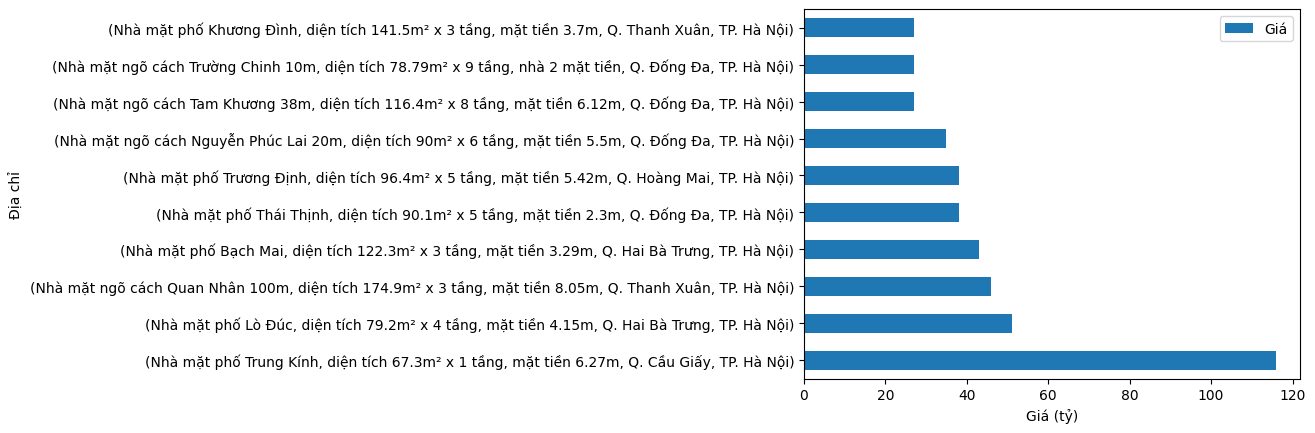

In [86]:
# Top10 nhà có giá cao nhất
top_10_house = df.groupby(['Tên Nhà','Địa chỉ'])['Giá'].max().nlargest(10, keep = 'first')
top_10_house = pd.DataFrame(top_10_house)
top_10_house.plot(kind = 'barh')
plt.xlabel("Giá (tỷ)")
plt.ylabel("Địa chỉ")
plt.show()

In [87]:
Price_by_District = df.groupby("Địa chỉ")["Giá"].mean().sort_values(ascending=False).astype("float")
Price_by_District = pd.DataFrame(Price_by_District)
Price_by_District


,Giá
Địa chỉ,
"Q. Cầu Giấy, TP. Hà Nội",21.333333
"Q. Thanh Xuân, TP. Hà Nội",17.750000
"Q. Đống Đa, TP. Hà Nội",17.500000
"Q. Hai Bà Trưng, TP. Hà Nội",14.583333
"Q. Hoàng Mai, TP. Hà Nội",12.166667


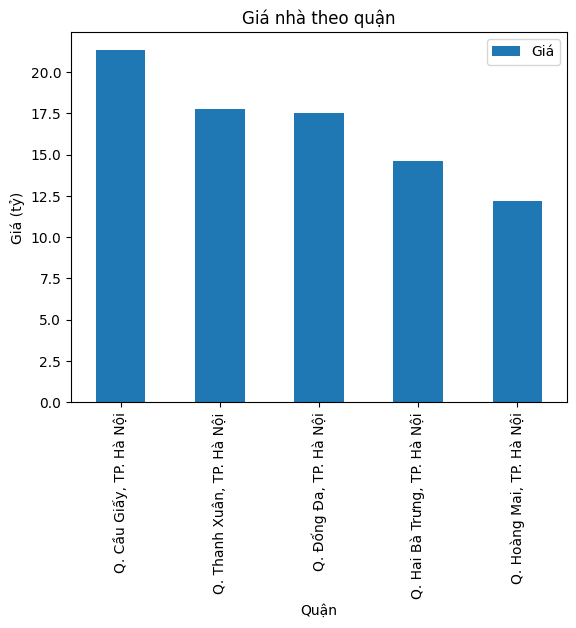

In [88]:
Price_by_District.plot(kind = "bar")
plt.title("Giá nhà theo quận")
plt.xlabel("Quận")
plt.ylabel("Giá (tỷ)")
plt.show()

=> Quận Cầu Giấy có giá nhà trung bình cao nhất, sắp xếp các quận từ 1-5

In [89]:
#xóa khoảng trắng
df['Địa chỉ'] = df['Địa chỉ'].str.strip()


In [90]:
df['Địa chỉ'] = df['Địa chỉ'].replace(['Q. Cầu Giấy, TP. Hà Nội','Q. Thanh Xuân, TP. Hà Nội','Q. Đống Đa, TP. Hà Nội','Q. Hai Bà Trưng, TP. Hà Nội','Q. Hoàng Mai, TP. Hà Nội'], ['5','4','3','2','1'], regex=False)
df['Địa chỉ'] = df['Địa chỉ'].astype('float').astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Địa chỉ         60 non-null     int64 
 1   Tên Nhà         60 non-null     object
 2   Số tầng         60 non-null     int64 
 3   Diện tích (m2)  60 non-null     int64 
 4   Giá             60 non-null     int64 
 5   Hướng           60 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.9+ KB


Tìm correlation: xem yếu tố nào sẽ ảnh hưởng nhiều nhất với căn nhà

In [91]:
df_num = df.select_dtypes(include = ["number"])
df_num

,Địa chỉ,Số tầng,Diện tích (m2),Giá
0,1,4,30,4
1,1,5,33,6
2,1,5,96,38
3,1,5,30,5
4,1,4,26,5
5,1,4,75,13
6,1,4,33,4
7,1,4,54,12
8,1,5,88,26
9,1,2,82,7


In [92]:
correlation = df_num.corr()["Giá"].sort_values(ascending=False)
correlation

Giá               1.000000
Diện tích (m2)    0.522161
Địa chỉ           0.177423
Số tầng          -0.103445
Name: Giá, dtype: float64

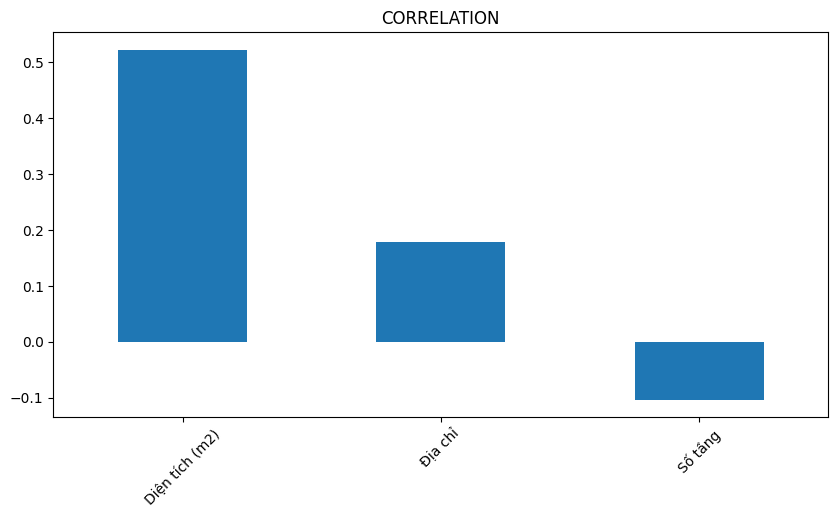

In [93]:
plt.subplots(figsize = (10,5))
correlation.drop("Giá").plot(kind = 'bar')
plt.title("CORRELATION")
plt.xticks(rotation = 45, ha='center')
plt.show()

=> diện tích là yếu tố ảnh hưởng nhiều nhất , theo sau đó là Quận

BUILD MODEL

In [94]:
# train the data
X = df[["Số tầng", "Diện tích (m2)","Địa chỉ"]]
y = df["Giá"]

In [95]:
# 20% of the data is on the test set and 80% is on the training set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [97]:
# save the scaler for the app using jooblib
jb.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [98]:
X_test = scaler.fit_transform(X_test)

In [99]:
# BUILD MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 4.91120308, 22.64226657,  3.06211051, 31.14938168, 18.20711458,
       18.55005779,  9.58840625, 22.49029412, 33.91571063, 14.04496064,
       22.36926853, 11.56922562])

In [100]:
mse = mean_squared_error(y_test, y_pred, squared=False)
print("Tổng bình phương sai số trên tập mẫu:", mse) 
print("Hệ số hồi quy:", lr.coef_) 
print("Sai số:", lr.intercept_)

Tổng bình phương sai số trên tập mẫu: 8.30155238263292
Hệ số hồi quy: [-1.73882765  8.52605798  2.92607431]
Sai số: 17.708333333333332


c:\Users\AD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [101]:
jb.dump(lr ,"model.pkl")

['model.pkl']

In [102]:
#CHECK ACCURACY
score = r2_score(y_test, y_pred)
print("The accuracy of the model is {}%".format(round(score, 2) *100))

The accuracy of the model is 13.0%


In [103]:
print(lr.score(X_test, y_test))

0.13040035379686676
